### Methane dynamics across a landscape gradient of permafrost thaw

In these two notebooks: CH4 fluxes (Pt1) & Permafrost fluxes (Pt2) we will carry out a series of exercises that you will need to complete to answer section B of the report. 

In this notebook, we will first import and analyse field data available as a supplement to the paper\
**Methane dynamics regulated by microbial community response to permafrost thaw** paper by McCalley et al. (2014).

This paper uses long-term monitoring data collected from across a permafrost thaw gradient (Stordalen Mire, Sweden) to examine how changes in the microbial community is regulating methane cycling in the Arctic.  

The paper is available here: https://www.nature.com/articles/nature13798#Sec16 and you should read the paper in detail before beginning the exercises if you haven't already. 

Data we will use here was downloaded directly as an excel .xlsx file from this website: https://static-content.springer.com/esm/art%3A10.1038%2Fnature13798/MediaObjects/41586_2014_BFnature13798_MOESM61_ESM.xlsx

The data we provide is taken from two tabs on the excel sheet and saved as .csv files (after removing first line).

Specifically here we will: - 

1) learn how to install R packages into this notebook, so we can use them\
2) learn how to import a csv file and examine its structure\
3) modify how data is stored in R to allow us to carry out analyses\
4) plot the data simply and extract some simple information 

Once you have completed the above, you will asked to use this knowledge to **create your own plot of 13C-CH4 fluxes and extract simple data** This will enable you to answer the first questions in section 2 of the report.

### Installing required packages into R. 

Here we are installing a package called ggplot that provides useful plotting tools. 
We do this by supplying R with an online repository location for the computer to look to, and source, the requested package. 

In this way you can download thousands of useful packages that allow you to conduct anything from basic statistical analyses to complex spatial and modelling analyses. Importantly, documenting all of the steps also allows you to ensure repeatablity in your analyses, allows you to repeat them rapidly or share with others. 

OK, so lets get started.\

Run the embedded code below (usually by clicking on it and pressing *shift*-*enter* together).\
*NB*. this first box may take a little while to complete (look for a star on the left when still running). 

In [1]:
install.packages("ggplot2", repos='http://cran.us.r-project.org')
library(ggplot2)


The downloaded binary packages are in
	/var/folders/8t/cy2vk1md0jvdl4g137j0n4r40000gn/T//Rtmp8xKqes/downloaded_packages


If successful, you should now see a message pop up just above saying the binary package has been downloaded. 
If so, great! - you have just successfully downloaded a package for R to use from the online repository and loaded it in memory ready for use.  

### Importing a csv file

Next, we'll import a .csv file containing data from the paper. 

When you run the code below, you should see eight lines of a data frame pop up below.
This is stored as a data frame in R's memory as a parameter called *table*. Note that the actual table is much bigger than you can see here.  

Uncheck (remove) the hash sign in front of *tail(table)* code line below and rerun the code. 
You should now see the first six, and final six lines of the table below (scroll down if necessary). 

From this output we can tell we have:

- data spanning 1 July 2011 to 16 October 2011
- we have 108 rows of data
- a 'Date' column with daily increments
- average (ave) daily gas 'Flux' (mg CH<sub>4</sub> m<sup>-2</sup> h<sup>-1</sup>)
- the standard error of the mean ('SEM') of daily fluxes (calculated from 2-3 measurements during that day)


Glimpsing the top and base of the table helps you to check data imports have been successful and are useful in determining what your data look like.

In [2]:
table <- read.csv("Fig1a_data_long.csv", header= TRUE, sep=(",") )
head(table)
#tail(table)

,Date,X,Flux,SEM
,<fct>,<fct>,<dbl>,<dbl>
1,01/07/2011,Palsa,0.01,-0.19
2,02/07/2011,Palsa,0.01,-0.22
3,03/07/2011,Palsa,0.02,-0.27
4,04/07/2011,Palsa,0.01,-0.28
5,05/07/2011,Palsa,0.02,-0.04
6,06/07/2011,Palsa,0.02,-0.02


Its always important to check that the data not only looks right, but is also in the correct format. This is almost always the reason for dreaded errors..

Its good practice to summarise the data to find out more about it. 

Run the code below to summarise the data.

We can tell from this: 
- we have three vegetation 'groups' (Eriophorum, Palsa and Sphagnum) in a column named 'X'
- our flux values range from a min of 0.00 to 18.62 with a mean value of 3.42 mg CH<sub>4</sub> m<sup>-2</sup> h<sup>-1</sup>
- we have NA's in our 'Flux' and 'SEM' columns (which represents missing values). 


Loads more useful functions can help you to work out what your data look like. Check out the numerous resources online e.g. http://www.sr.bham.ac.uk/~ajrs/R/r-show_data.html

Now, remove the *#* below and rerun the script. 
You should now see list with what data type each column is currently stored as (e.g. factor/ numeric). 


In [3]:
summary(table)
#sapply(table, class)

         Date              X            Flux             SEM         
 01/07/2011:  3   Eriophorum:108   Min.   : 0.000   Min.   :-0.2800  
 01/08/2011:  3   Palsa     :108   1st Qu.: 0.020   1st Qu.: 0.0100  
 01/09/2011:  3   Sphagnum  :108   Median : 1.415   Median : 0.2900  
 01/10/2011:  3                    Mean   : 3.423   Mean   : 0.7487  
 02/07/2011:  3                    3rd Qu.: 6.312   3rd Qu.: 0.8450  
 02/08/2011:  3                    Max.   :18.620   Max.   : 7.4300  
 (Other)   :306                    NA's   :38       NA's   :37       

R can store data in many different formats, including vectors, matrices, arrays and many more.

Here, you can see from above we have factors ('Date' & 'X') and numeric data ('Flux & 'SEM'): 
- Factors tell R that data are nominal in nature (similar to SPSS terminology) i.e. groups
- Numeric tell R that data are a numeric vector i.e. a list of numbers.

So here, 'Flux' and 'SEM' columns are in the right format (e.g. lists of numbers).\
Column 'X' is our list of vegetation types (Eriophorum, Palsa and Sphagnum) as groupings, or factors, so this is correct too.\
However, our column 'Date' is currently stored as a factor which is incorrect.

Before we move on then we need to tell R that 'Date' actually represents dates. 
To do this, we create a dataframe called "Dates" by converting the "Date" column in the table. 
We then replace the new Dates back into the Date column.  

See here for useful information on data types: 
https://www.statmethods.net/input/datatypes.html


In [4]:
Dates<-as.Date(table$Date, format = "%d/%m/%Y")
table$Date<-Dates #replace the column Date in dataframe table with Dates

Now we rerun the code to see what types of data our dataframe table contains. You can now hopefully see that we have converted the 'Date' column to a date data format.. phew.

In [5]:
sapply(table, class)

Date         X      Flux       SEM 
   "Date"  "factor" "numeric" "numeric"

Now our data is finally in a the correct type, we can start using it. Below, we use the ggplot package that imported at the beginning to plot our data.

Run the script below to generate a plot. 

Although the script looks relatively complicated, hopefully you can see just how quickly complex data sets (including far bigger than excel can even hold) can be manipulated and plotted to see trends. Its not publication quality of course and lots more could be done to improve it, but it shows the general trends and is good enough for our purposes here. 

Compare this with Fig 1 from McCalley et al. (2016) paper.  

Warning message:
“Removed 38 rows containing missing values (geom_point).”


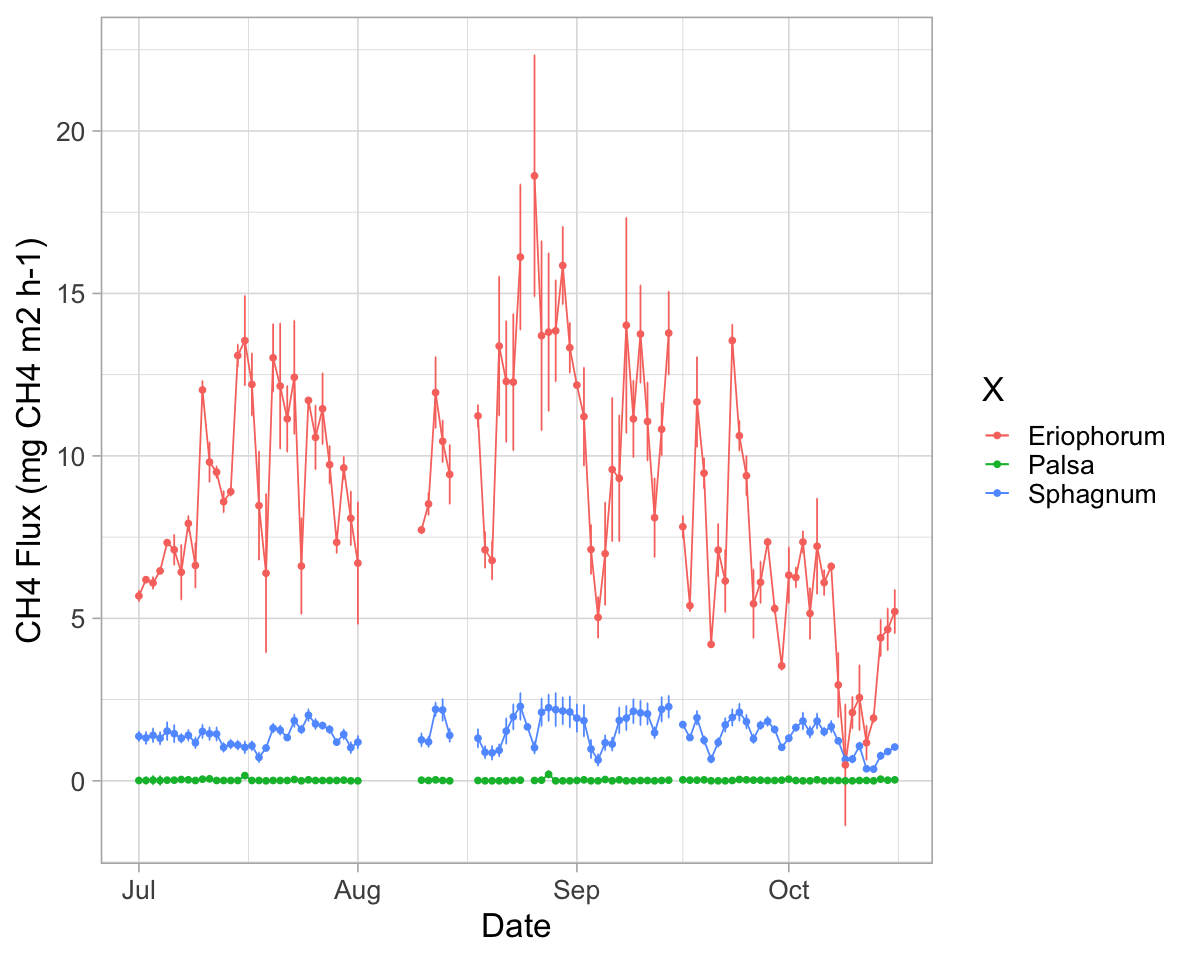

In [8]:
theme_set(theme_light(base_size = 20)) #use a ggplot2 theme called light

options(repr.plot.width=10, repr.plot.height=8) # size of plot

ggplot(table, aes(x=Date, y=Flux, colour=X)) + # plot using data from dataframe 'table'
    geom_errorbar(aes(ymin=Flux-SEM/2, ymax=Flux+SEM/2), width=.1) + # create an upper y and lower y by adding or subtracting 1/2 of the SEM
    geom_line() + # add a line
    geom_point() + # add data points
    xlab('Date') +   # title of x-axis
    ylab('CH4 Flux (mg CH4 m2 h-1)') # title of y-axis

Once imported, it is relatively straightforward to manipulate, summarise and plot data in R - although like all things it take time to learn. Below we calculate the mean and standard deviation of all of the fluxes (CH<sub>4</sub> m<sup>-2</sup> h<sup>-1</sup>), seperated by vegetation type.   

To do this, we use the *tapply* built-in function. We provide the function with the dataframe name (in this case *table* and the column we want to use by using the dollar sign (for instance table$SEM will show us a list of numbers from the SEM column). 
Run the code below to see how it looks: 

Now uncheck the next two lines of code and rerun. You should see that this doesnt work. Why? Well as we saw using just the first line of code, that data contains *NAs* or missing data. We are currently asking for R to give us an average including unspecified numbers, which it cannot do. 

Re-check these two lines and uncheck the final two. Hopefully, this should now work and will provide you with an average and standard deviation of all of the fluxes grouped by X - our vegetation type. 

In [10]:
table$SEM

#tapply(table$Flux, table$X, mean)
#tapply(table$Flux, table$X, sd

#tapply(table$Flux, table$X, mean, na.rm=TRUE)
#tapply(table$Flux, table$X, sd, na.rm=TRUE)

[1] -0.19 -0.22 -0.27 -0.28 -0.04 -0.02  0.01 -0.07  0.00 -0.01 -0.02  0.02
 [13]  0.00 -0.01  0.02 -0.17  0.00 -0.01 -0.03 -0.01 -0.01  0.01 -0.02  0.00
 [25]  0.02 -0.01  0.00 -0.01 -0.01 -0.01 -0.02 -0.02    NA    NA    NA    NA
 [37]    NA    NA    NA    NA  0.01  0.01 -0.03  0.00  0.00 -0.02    NA    NA
 [49]  0.00  0.00  0.00  0.00  0.01  0.00  0.01  0.94 -0.02  0.00  0.21  0.01
 [61]  0.00  0.00  0.01  0.04  0.00  0.00 -0.06  0.00  0.01  0.00  0.00  0.01
 [73]  0.00  0.00  0.00  0.04    NA -0.01  0.00  0.03 -0.04  0.00  0.00  0.00
 [85]  0.00  0.01  0.03  0.00  0.05  0.02  0.00  0.00  0.09  0.02  0.04  0.00
 [97]  0.05  0.00  0.02  0.01  0.01  0.00  0.01  0.00  0.00  0.06  0.03  0.10
[109]  0.30  0.38  0.43  0.39  0.56  0.54  0.28  0.34  0.34  0.42  0.40  0.42
[121]  0.28  0.28  0.28  0.37  0.29  0.31  0.19  0.28  0.29  0.14  0.39  0.24
[133]  0.37  0.32  0.20  0.24  0.17  0.31  0.35  0.39    NA    NA    NA    NA
[145]    NA    NA    NA    NA  0.41  0.33  0.42  0.68  0.41    NA    NA    NA
[157]  0.57  0.38  0.43  0.38  0.79  0.78  0.83    NA  0.37  0.85  0.82  1.03
[169]  0.84  0.96  0.85  0.98  0.57  0.36  0.47  0.41  0.80  0.75  0.75  0.76
[181]  0.66  0.35  0.76  0.68    NA  0.19  0.02  0.43  0.26  0.23  0.28  0.43
[193]  0.52  0.53  0.43  0.27  0.24  0.29  0.21  0.12  0.21  0.22  0.52  0.35
[205]  0.47  0.26  0.36  0.05  0.06  0.22  0.22  0.08  0.08  0.21  0.17  0.13
[217]  0.33  0.03  0.37  0.01  0.05  0.93  1.69  0.47  1.38  0.56  1.22  0.36
[229]  0.66  0.26  0.68  2.76  1.92  3.34  4.88  2.08  3.86  2.03  3.49  2.95
[241]  0.06  1.97  2.19  1.16  0.66  0.70  1.66  3.75    NA    NA    NA    NA
[253]    NA    NA    NA    NA  0.20  0.68  2.19  1.29  1.82    NA    NA    NA
[265]  0.68  1.11  1.18  4.28  3.72  4.20  4.47    NA  7.43  5.83  4.86  3.12
[277]  2.39  1.54  0.02  3.02  1.52  1.26  3.16  4.42  3.88  6.63  2.36  3.00
[289]  2.41  2.43  1.62  2.56    NA  0.68  0.35  2.77  0.93  0.04  1.62  1.92
[301]  0.99  0.92  1.22  2.11  1.28  0.20  0.27  0.26  1.71  0.62  0.67  1.57
[313]  2.94  0.78  0.19  1.99  3.73  0.98  2.00  1.06  0.27  1.13  1.29  1.34

Eriophorum      Palsa   Sphagnum 
8.81063158 0.01736842 1.46218750

Eriophorum      Palsa   Sphagnum 
3.59739912 0.02776078 0.46360646

## Isotopic composition of methane emitted from vegetation types.

**Now over to you!** 

Copy and adapt the above code to import the file *Fig1b_data_long.csv* into R. \
Plot the isotopic composition of the gases emitted from each vegetation type as we did for the flux above. 

Once you have a graph of this copy it in into your report and answer part 1. 

Please note, the y-axis can simply be labelled d13C-CH4 (per mil), as special characters (e.g. $\delta$<sup>13</sup>C ) can be tricky to impliment in R scripts so I'm not expecting this for your reports. 

In [ ]:
### Add your adapted code blocks here and in new blocks below to plot the isotopic ratio of fluxes 
### from Eriophorum and Sphagnum (note no isotopic data for Palsa vegetation is available 
### - due to such low fluxes)